In [ ]:
# dataset link: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

Data Collection and preprocessing

In [44]:
car_dataset = pd.read_csv('car data.csv')

In [45]:
car_dataset.shape

(301, 9)

In [46]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [48]:
# Checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [49]:
# Checking the distribition of categorical data
car_dataset['Fuel_Type'].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

In [50]:
car_dataset['Car_Name'].value_counts()

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64

In [51]:
car_dataset['Seller_Type'].value_counts()

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64

In [52]:
car_dataset['Transmission'].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

Encoding the Categorical Data

In [53]:
# encoding fuel type column
car_dataset.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel': 1, 'CNG' : 2},'Seller_Type':{'Dealer' : 0, 'Individual' : 1}, 'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace= True)

C:\Users\Mahdi\AppData\Local\Temp\ipykernel_15492\1121947375.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type' : {'Petrol' : 0, 'Diesel': 1, 'CNG' : 2},'Seller_Type':{'Dealer' : 0, 'Individual' : 1}, 'Transmission' : {'Manual' : 0, 'Automatic' : 1}}, inplace= True)


**Fuel_Type**
    [0 -> Petrol,
1 -> Diesel,
2 -> CNG]

**Seller_Type**
    [0 -> Dealer,
1 -> Individual]

**Transmission**
    [0 -> Manual,
1 -> Automatic]

In [54]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting into features and the labels

In [55]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis= 1)

In [56]:
Y = car_dataset['Selling_Price']

Splitting the data into training data and test data

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.1, random_state= 2)

In [58]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


Model Training

1. Linear Regression

In [59]:
linear_reg_model = LinearRegression()

In [60]:
linear_reg_model.fit(X_train, Y_train)

LinearRegression()

Model evaluation

In [61]:
# Prediction on the training data
training_data_prediction = linear_reg_model.predict(X_train)

In [62]:
# Using R SQUARED ERROR 
error_score = metrics.r2_score(Y_train, training_data_prediction) * 100

In [63]:
print("R SQUARED ERROR:",round(error_score, 2))

R SQUARED ERROR: 87.99


Visualize the actual price and the predicted price

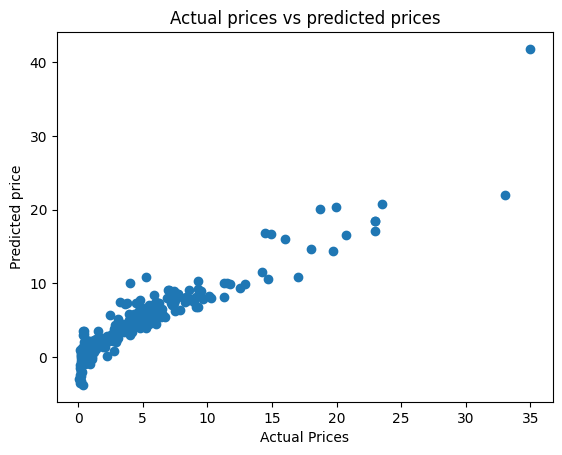

In [64]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted price')
plt.title('Actual prices vs predicted prices')
plt.show()

In [65]:
# Prediction on test data
test_data_prediction = linear_reg_model.predict(X_test)

In [66]:
# Using R SQUARED ERROR 
test_error_score = metrics.r2_score(Y_test, test_data_prediction) * 100

In [67]:
print("R SQUARED ERROR: ", round(test_error_score, 2))

R SQUARED ERROR:  83.66


Plotting on test data

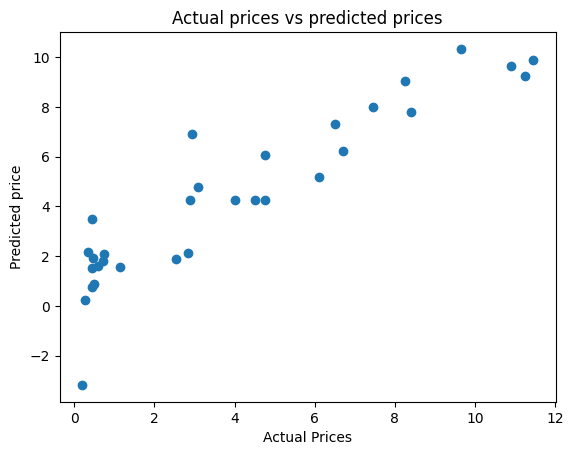

In [68]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted price')
plt.title('Actual prices vs predicted prices')
plt.show()

In [69]:
input_data = (2013,9.54,43000,1,0,0,0)

input_data_to_np_array = np.asarray(input_data)

reshaped_input_data = input_data_to_np_array.reshape(1, -1)

prediction = linear_reg_model.predict(reshaped_input_data)
print(prediction)

[6.81795378]


c:\Users\Mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**2. LASSO Regression**

In [70]:
lasso_reg_model = Lasso()

In [71]:
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [72]:
# training data prediction
training_data_prediction_Lasso = lasso_reg_model.predict(X_train)

Text(0, 0.5, 'Predicted prices')

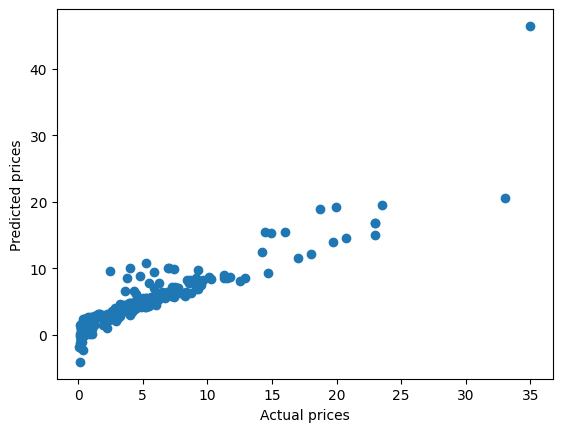

In [81]:
plt.scatter(Y_train, training_data_prediction_Lasso)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')

In [73]:
train_error_score = metrics.r2_score(Y_train, training_data_prediction) * 100

In [74]:
print("R SQUARED ERROR:", train_error_score)

R SQUARED ERROR: 87.99451660493699


In [75]:
test_data_prediction_LASSO = lasso_reg_model.predict(X_test)

Text(0, 0.5, 'Predicted prices')

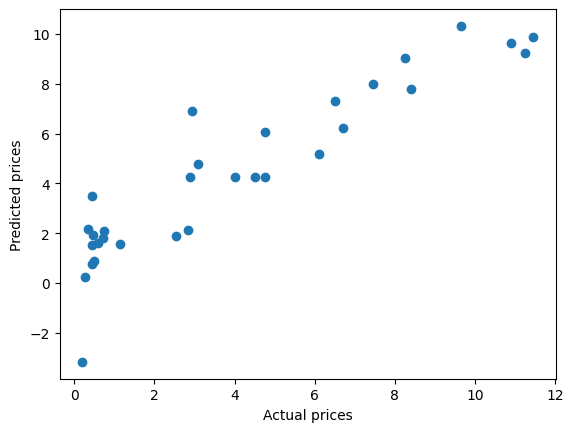

In [82]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')

In [78]:
test_error_score = metrics.r2_score(Y_test, test_data_prediction) * 100

In [79]:
print("R SQUARED ERROR:", test_error_score)

R SQUARED ERROR: 83.65766715026473


Making the Predictive System

In [89]:
input_data = (2013,9.54,43000,1,0,0,0)

input_data_to_np_array = np.asarray(input_data)

reshaped_input_data = input_data_to_np_array.reshape(1, -1)

linear_reg_prediction = linear_reg_model.predict(reshaped_input_data)
print("Prediction with Linear Regression:", linear_reg_prediction)

lasso_reg_model_prediction = lasso_reg_model.predict(reshaped_input_data)
print("Prediction with LASSO regression", lasso_reg_model_prediction)

Prediction with Linear Regression: [6.81795378]
Prediction with LASSO regression [5.3881834]


c:\Users\Mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Mahdi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
